<a href="https://colab.research.google.com/github/Memento2121/SeaStateForcastDL/blob/main/(96%2C24)_All_Models_Marine_ie_M6_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and process the csv dataset

In [1]:
import pandas as pd

# Dataset URL (CSV format, for station_id = "M6")
url = "https://erddap.marine.ie/erddap/tabledap/IWBNetwork.csv?station_id%2CCallSign%2Clongitude%2Clatitude%2Ctime%2CAtmosphericPressure%2CWindDirection%2CWindSpeed%2CGust%2CWaveHeight%2CWavePeriod%2CMeanWaveDirection%2CHmax%2CAirTemperature%2CDewPoint%2CSeaTemperature%2Csalinity%2CRelativeHumidity%2CSprTp%2CThTp%2CTp%2CQC_Flag&station_id=%22M6%22"

# Load data
df = pd.read_csv(url)

# Ensure the 'time' column is in datetime format
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Show first few rows
print("🔍 Preview of the dataset:")
display(df.head())

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Show shape of the data
print(f"\n📊 Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Show column names and types
print("\n🧾 Column names and data types:")
print(df.dtypes)


<ipython-input-1-c3362e222a16>:7: DtypeWarning: Columns (2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)
<ipython-input-1-c3362e222a16>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'], errors='coerce')


🔍 Preview of the dataset:


,station_id,CallSign,longitude,latitude,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,...,Hmax,AirTemperature,DewPoint,SeaTemperature,salinity,RelativeHumidity,SprTp,ThTp,Tp,QC_Flag
0,NaN,NaN,degrees_east,degrees_north,NaT,millibars,degrees true,knots,knots,meters,...,meters,degrees_C,degrees_C,degrees_C,dimensionless,percent,degrees,degrees_true,seconds,NaN
1,M6,62095.0,-15.88135,53.07482,2006-09-25 13:00:00+00:00,1009.6,280.0,11.0,NaN,NaN,...,NaN,15.0,NaN,15.5,NaN,NaN,NaN,NaN,NaN,1.0
2,M6,62095.0,-15.88135,53.07482,2006-09-25 14:00:00+00:00,1010.0,280.0,15.0,20.0,1.2,...,NaN,14.7,12.4,15.5,NaN,86.0,NaN,NaN,NaN,1.0
3,M6,62095.0,-15.88135,53.07482,2006-09-25 15:00:00+00:00,1010.4,270.0,15.0,22.0,1.3,...,NaN,13.9,11.4,15.4,NaN,85.0,NaN,NaN,NaN,1.0
4,M6,62095.0,-15.88135,53.07482,2006-09-25 16:00:00+00:00,1010.8,280.0,13.0,19.0,1.4,...,NaN,14.8,11.7,15.4,NaN,82.0,NaN,NaN,NaN,1.0



📊 Dataset contains 139203 rows and 22 columns.

🧾 Column names and data types:
station_id                         float64
CallSign                           float64
longitude                          float64
latitude                           float64
time                   datetime64[ns, UTC]
AtmosphericPressure                float64
WindDirection                      float64
WindSpeed                          float64
Gust                               float64
WaveHeight                         float64
WavePeriod                         float64
MeanWaveDirection                  float64
Hmax                               float64
AirTemperature                     float64
DewPoint                           float64
SeaTemperature                     float64
salinity                           float64
RelativeHumidity                   float64
SprTp                              float64
ThTp                               float64
Tp                                 float64
QC_Flag          

In [2]:
df = df.drop(columns=['station_id', 'CallSign', 'longitude', 'latitude', 'QC_Flag', 'MeanWaveDirection'])

df = df.drop(axis=1, index=1)

display(df.head())

,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,Hmax,AirTemperature,DewPoint,SeaTemperature,salinity,RelativeHumidity,SprTp,ThTp,Tp
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-09-25 14:00:00+00:00,1010.0,280.0,15.0,20.0,1.2,5.0,NaN,14.7,12.4,15.5,NaN,86.0,NaN,NaN,NaN
3,2006-09-25 15:00:00+00:00,1010.4,270.0,15.0,22.0,1.3,5.0,NaN,13.9,11.4,15.4,NaN,85.0,NaN,NaN,NaN
4,2006-09-25 16:00:00+00:00,1010.8,280.0,13.0,19.0,1.4,5.0,NaN,14.8,11.7,15.4,NaN,82.0,NaN,NaN,NaN
5,2006-09-25 17:00:00+00:00,1011.0,280.0,12.0,20.0,1.6,5.0,NaN,14.8,10.7,15.4,NaN,77.0,NaN,NaN,NaN


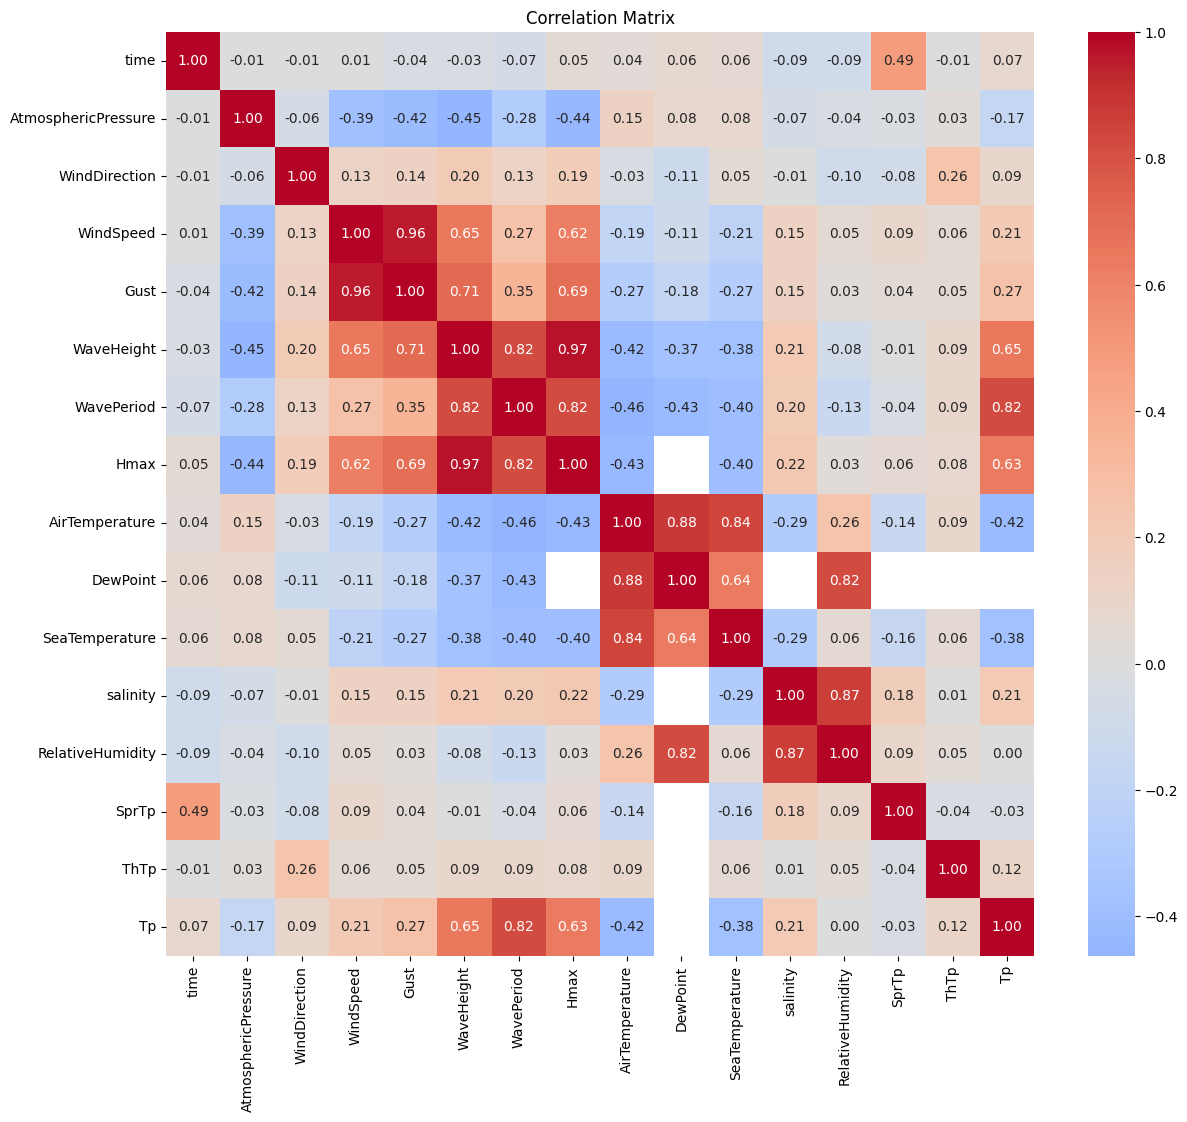

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [4]:
df = df.drop(columns=['DewPoint'])

df = df.dropna(subset=['time'])

df = df.reset_index(drop=True)

display(df.head())

,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,Hmax,AirTemperature,SeaTemperature,salinity,RelativeHumidity,SprTp,ThTp,Tp
0,2006-09-25 14:00:00+00:00,1010.0,280.0,15.0,20.0,1.2,5.0,NaN,14.7,15.5,NaN,86.0,NaN,NaN,NaN
1,2006-09-25 15:00:00+00:00,1010.4,270.0,15.0,22.0,1.3,5.0,NaN,13.9,15.4,NaN,85.0,NaN,NaN,NaN
2,2006-09-25 16:00:00+00:00,1010.8,280.0,13.0,19.0,1.4,5.0,NaN,14.8,15.4,NaN,82.0,NaN,NaN,NaN
3,2006-09-25 17:00:00+00:00,1011.0,280.0,12.0,20.0,1.6,5.0,NaN,14.8,15.4,NaN,77.0,NaN,NaN,NaN
4,2006-09-25 18:00:00+00:00,1011.6,270.0,11.0,18.0,1.8,6.0,NaN,14.8,15.4,NaN,77.0,NaN,NaN,NaN


In [5]:
# Show shape of the data
print(f"\n📊 Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for missing values
print("\n❓ Missing values per column:")
print(df.isnull().sum())

# Show basic statistics
print("\n📈 Descriptive statistics for numeric columns:")
display(df.describe(include='all'))


📊 Dataset contains 139201 rows and 15 columns.

❓ Missing values per column:
time                        0
AtmosphericPressure       636
WindDirection            5324
WindSpeed               18759
Gust                    25455
WaveHeight              13789
WavePeriod              13741
Hmax                    95152
AirTemperature           4252
SeaTemperature           3143
salinity               108076
RelativeHumidity         8235
SprTp                   95159
ThTp                    93572
Tp                      93572
dtype: int64

📈 Descriptive statistics for numeric columns:


,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,Hmax,AirTemperature,SeaTemperature,salinity,RelativeHumidity,SprTp,ThTp,Tp
count,139201,138565.000000,133877.000000,120442.000000,113746.000000,125412.000000,125460.000000,44049.000000,134949.000000,136058.000000,31125.000000,130966.000000,44042.000000,45629.000000,45629.000000
mean,2015-11-17 07:08:23.815345920+00:00,1011.475094,212.227433,16.414345,23.731214,3.359580,7.204752,5.092863,11.741335,12.854397,34.532339,80.085431,62.578159,233.462866,10.472412
min,2006-09-25 14:00:00+00:00,909.900000,0.000000,0.000000,0.000000,0.000000,3.516000,0.000000,0.600000,0.000000,0.341800,0.000000,8.438000,0.000000,3.047000
25%,2010-10-25 16:00:00+00:00,1003.300000,160.000000,11.157000,16.000000,2.100000,6.000000,3.125000,9.922000,11.289000,35.302730,73.000000,29.883000,209.531000,8.555000
50%,2015-12-26 17:00:00+00:00,1012.700000,229.000000,16.000000,23.000000,3.000000,7.000000,4.688000,11.700000,12.477000,35.412520,81.152000,42.188000,265.781000,10.313000
75%,2020-12-02 22:00:00+00:00,1021.000000,280.000000,21.000000,30.283000,4.300000,8.000000,6.563000,13.700000,14.500000,35.506900,90.000000,74.883000,298.125000,12.070000
max,2025-03-27 18:00:00+00:00,1046.400000,360.000000,56.582000,84.930000,17.200000,15.469000,29.883000,18.700000,18.300000,35.659180,100.000000,316.406000,358.594000,23.789000
std,NaN,13.330494,87.688839,7.116726,10.080972,1.737895,1.417793,2.636630,2.495343,1.802869,2.912415,14.609706,49.201172,98.170142,2.563222


In [6]:
import pandas as pd

# Assume df is your DataFrame with 139197 rows.
threshold = len(df) / 2  # Half the number of rows

# Identify columns with missing values greater than the threshold
cols_to_drop = df.columns[df.isna().sum() > threshold]
print("Columns to drop:", list(cols_to_drop))

# Drop the identified columns
df = df.drop(columns=cols_to_drop)

print("Remaining columns:", df.columns)
display(df.describe(include='all'))

Columns to drop: ['Hmax', 'salinity', 'SprTp', 'ThTp', 'Tp']
Remaining columns: Index(['time', 'AtmosphericPressure', 'WindDirection', 'WindSpeed', 'Gust',
       'WaveHeight', 'WavePeriod', 'AirTemperature', 'SeaTemperature',
       'RelativeHumidity'],
      dtype='object')


,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,AirTemperature,SeaTemperature,RelativeHumidity
count,139201,138565.000000,133877.000000,120442.000000,113746.000000,125412.000000,125460.000000,134949.000000,136058.000000,130966.000000
mean,2015-11-17 07:08:23.815345920+00:00,1011.475094,212.227433,16.414345,23.731214,3.359580,7.204752,11.741335,12.854397,80.085431
min,2006-09-25 14:00:00+00:00,909.900000,0.000000,0.000000,0.000000,0.000000,3.516000,0.600000,0.000000,0.000000
25%,2010-10-25 16:00:00+00:00,1003.300000,160.000000,11.157000,16.000000,2.100000,6.000000,9.922000,11.289000,73.000000
50%,2015-12-26 17:00:00+00:00,1012.700000,229.000000,16.000000,23.000000,3.000000,7.000000,11.700000,12.477000,81.152000
75%,2020-12-02 22:00:00+00:00,1021.000000,280.000000,21.000000,30.283000,4.300000,8.000000,13.700000,14.500000,90.000000
max,2025-03-27 18:00:00+00:00,1046.400000,360.000000,56.582000,84.930000,17.200000,15.469000,18.700000,18.300000,100.000000
std,NaN,13.330494,87.688839,7.116726,10.080972,1.737895,1.417793,2.495343,1.802869,14.609706


In [7]:
import numpy as np
import pandas as pd

# Assume df['time'] is already a datetime column
df['hour'] = df['time'].dt.hour
df['month'] = df['time'].dt.month

# Create cyclical features for hour: 24 hours in a day
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# Create cyclical features for month: 12 months in a year
# Subtract 1 to start from 0
df['month_sin'] = np.sin(2 * np.pi * (df['month'] - 1) / 12)
df['month_cos'] = np.cos(2 * np.pi * (df['month'] - 1) / 12)

display(df[['time', 'hour', 'hour_sin', 'hour_cos', 'month', 'month_sin', 'month_cos']].head())

,time,hour,hour_sin,hour_cos,month,month_sin,month_cos
0,2006-09-25 14:00:00+00:00,14,-0.500000,-8.660254e-01,9,-0.866025,-0.5
1,2006-09-25 15:00:00+00:00,15,-0.707107,-7.071068e-01,9,-0.866025,-0.5
2,2006-09-25 16:00:00+00:00,16,-0.866025,-5.000000e-01,9,-0.866025,-0.5
3,2006-09-25 17:00:00+00:00,17,-0.965926,-2.588190e-01,9,-0.866025,-0.5
4,2006-09-25 18:00:00+00:00,18,-1.000000,-1.836970e-16,9,-0.866025,-0.5


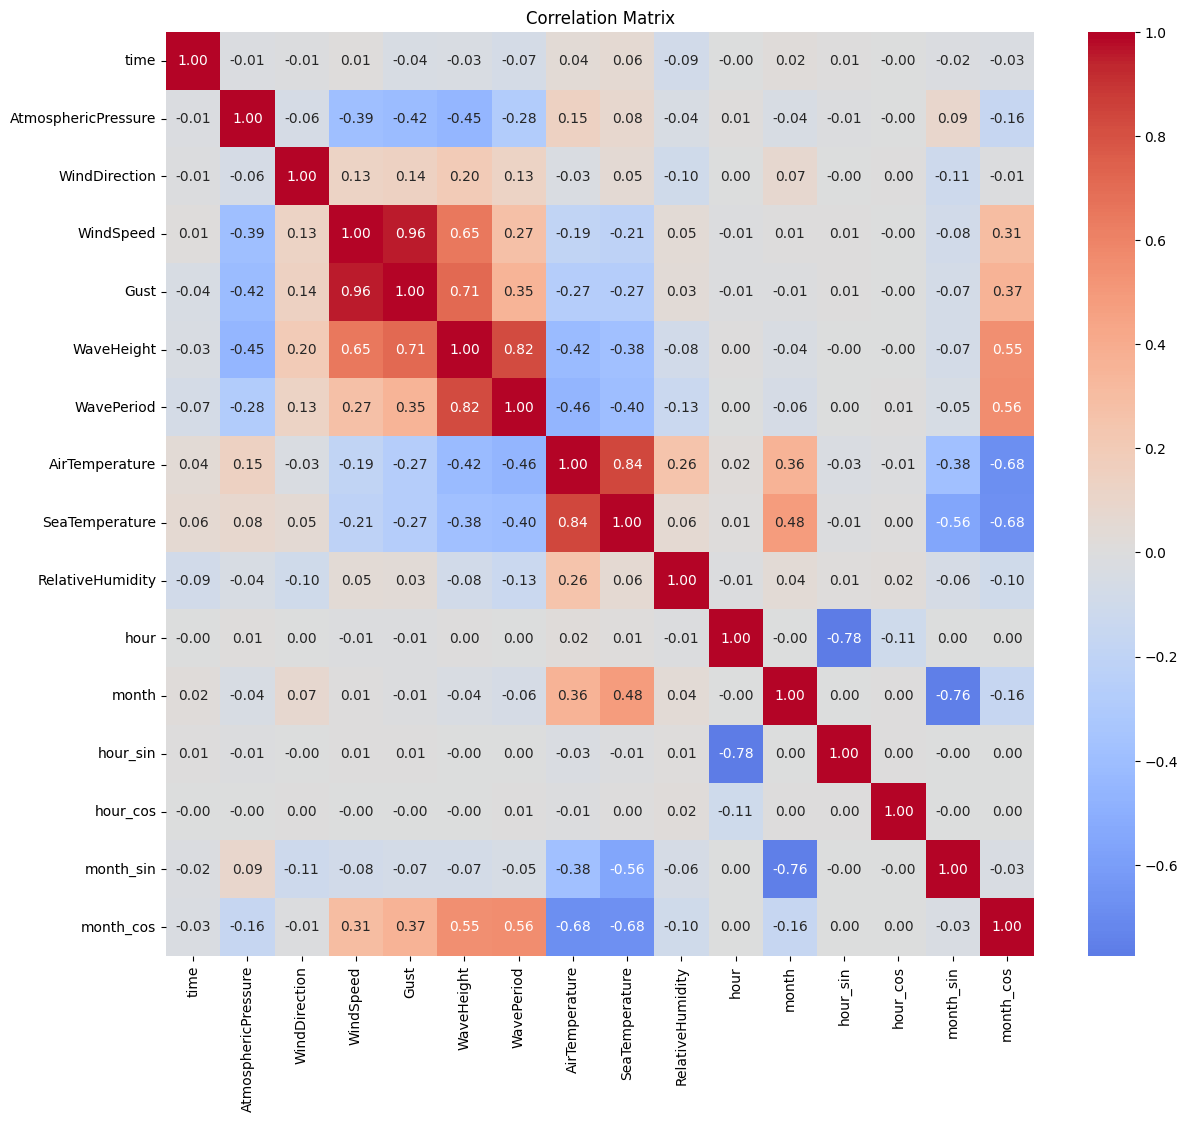

In [8]:
corr_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [9]:
df = df.drop(columns=['RelativeHumidity'])

In [10]:
# Count the number of points by year

df['year'] = df['time'].dt.year
year_counts = df['year'].value_counts().sort_index()

display(year_counts)

,count
year,
2006,2301
2007,8675
2008,8507
2009,8481
2010,8449
2011,8367
2012,8310
2013,7892
2014,2734


In [11]:
# Group by year and compute the mean for each numeric column
yearly_means = df.groupby('year').mean()

display(yearly_means)

,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,AirTemperature,SeaTemperature,hour,month,hour_sin,hour_cos,month_sin,month_cos
year,,,,,,,,,,,,,,,
2006,2006-11-12 21:27:52.490221824+00:00,1004.787310,218.686957,20.376799,29.643043,4.440783,7.744348,11.750587,12.976271,11.534985,10.874402,-0.003565,0.003822,-0.796244,0.395804
2007,2007-07-02 08:15:00.103746560+00:00,1014.452464,214.166763,14.944464,22.483527,3.479529,7.213293,12.380870,13.381072,11.497983,6.521614,-0.000329,0.001220,-0.003639,-0.001714
2008,2008-07-02 05:21:53.553544192+00:00,1011.679322,216.300306,16.532217,23.944395,4.420101,7.922370,11.744319,13.089623,11.506642,6.521688,-0.002457,0.000873,-0.011763,0.013294
2009,2009-07-01 23:01:38.903431424+00:00,1009.124197,209.758621,16.754304,25.807859,3.676662,7.474520,11.390404,12.853414,11.498644,6.509846,-0.000026,0.001465,0.003262,0.009392
2010,2010-07-02 00:43:32.758906624+00:00,1012.675830,195.573931,16.718672,25.555696,2.875566,6.943812,11.569029,12.832425,11.477335,6.511303,0.002085,0.000036,0.001526,0.016176
2011,2011-07-01 23:28:07.056292608+00:00,1010.881798,222.203939,16.943365,24.732203,3.478803,7.579839,11.226181,12.046630,11.464324,6.509741,0.000103,0.003623,-0.009836,0.014733
2012,2012-06-29 18:35:11.046931200+00:00,1013.253405,218.354060,15.207346,22.752451,3.098704,7.341009,11.455519,12.300361,11.400842,6.441516,0.003688,0.001479,0.010926,-0.007803
2013,2013-07-02 17:13:53.400912128+00:00,1011.655158,215.486486,17.886937,24.955914,3.441601,7.332395,11.664067,12.747855,11.359225,6.532818,0.003861,0.004486,0.004857,-0.029464
2014,2014-05-24 20:52:08.602779904+00:00,1007.043359,201.593282,14.702647,24.252165,3.125041,7.577576,10.756942,11.377527,11.326993,5.266642,0.001163,-0.006738,0.305821,0.025297


In [12]:
# Group by year and compute the number of missing values for each column
missing_by_year = df.groupby('year').apply(lambda x: x.isnull().sum())

display(missing_by_year)

<ipython-input-12-2e2a6b7791b6>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_year = df.groupby('year').apply(lambda x: x.isnull().sum())


,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,AirTemperature,SeaTemperature,hour,month,hour_sin,hour_cos,month_sin,month_cos,year
year,,,,,,,,,,,,,,,,
2006,0,0,1,8,1,1,1,2,0,0,0,0,0,0,0,0
2007,0,10,4,248,55,48,39,34,16,0,0,0,0,0,0,0
2008,0,15,9,204,2896,5353,5351,23,17,0,0,0,0,0,0,0
2009,0,17,71,174,4562,5773,5773,134,148,0,0,0,0,0,0,0
2010,0,46,286,6853,6869,100,102,12,233,0,0,0,0,0,0,0
2011,0,247,41,2293,2411,281,282,48,102,0,0,0,0,0,0,0
2012,0,234,1475,1558,1883,365,319,93,284,0,0,0,0,0,0,0
2013,0,2,122,2426,2312,70,73,264,83,0,0,0,0,0,0,0
2014,0,1,531,807,771,318,317,314,785,0,0,0,0,0,0,0


In [13]:
# Group by year and compute the std for each numeric column
yearly_std = df.groupby('year').std()

display(yearly_std)

,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,AirTemperature,SeaTemperature,hour,month,hour_sin,hour_cos,month_sin,month_cos
year,,,,,,,,,,,,,,,
2006,28 days 02:07:30.279115721,16.635562,76.627008,7.494397,10.098039,1.835306,1.314700,1.954026,1.188591,6.939002,0.916207,0.708454,0.706046,0.205792,0.408749
2007,105 days 12:58:50.795548088,12.975641,83.667212,7.834373,11.146269,1.946110,1.501326,2.524943,2.006522,6.927494,3.453213,0.707228,0.707066,0.708136,0.706146
2008,106 days 13:56:12.701436664,12.345514,88.023744,7.346593,11.117158,1.932458,1.354453,2.499779,1.605060,6.925627,3.482426,0.707326,0.706966,0.709913,0.704149
2009,106 days 06:05:41.376053404,13.987918,83.518199,7.075217,11.073751,1.851820,1.371681,2.508325,1.484585,6.927848,3.475308,0.707661,0.706634,0.706369,0.707857
2010,106 days 14:16:22.218893622,13.027224,101.646688,7.478231,9.255370,1.455976,1.215398,2.847251,1.934458,6.924084,3.487246,0.706621,0.707673,0.710112,0.703985
2011,106 days 15:34:28.229405430,12.659051,74.591869,6.702329,9.658292,1.631233,1.408592,2.036584,1.159604,6.937661,3.489045,0.706632,0.707657,0.705600,0.708473
2012,105 days 00:00:25.805153270,12.129208,84.762733,6.735229,9.248541,1.457207,1.344518,2.304386,1.721308,6.921076,3.430150,0.707642,0.706645,0.706724,0.707447
2013,103 days 09:25:59.049960877,14.319122,81.583324,7.504730,10.997540,1.808855,1.510647,2.833902,2.215345,6.930787,3.385742,0.707434,0.706845,0.711779,0.701858
2014,100 days 01:56:33.899018762,14.838985,90.338720,6.812830,10.605236,1.837321,1.469855,1.981203,1.557718,6.868310,3.325088,0.709175,0.705259,0.614661,0.726882


In [14]:
df = df.drop(columns=['hour', 'month', 'hour_sin', 'hour_cos', 'year'])

display(df.describe())

,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,AirTemperature,SeaTemperature,month_sin,month_cos
count,138565.000000,133877.000000,120442.000000,113746.000000,125412.000000,125460.000000,134949.000000,136058.000000,139201.000000,1.392010e+05
mean,1011.475094,212.227433,16.414345,23.731214,3.359580,7.204752,11.741335,12.854397,-0.033362,-3.004886e-02
std,13.330494,87.688839,7.116726,10.080972,1.737895,1.417793,2.495343,1.802869,0.703535,7.092463e-01
min,909.900000,0.000000,0.000000,0.000000,0.000000,3.516000,0.600000,0.000000,-1.000000,-1.000000e+00
25%,1003.300000,160.000000,11.157000,16.000000,2.100000,6.000000,9.922000,11.289000,-0.866025,-8.660254e-01
50%,1012.700000,229.000000,16.000000,23.000000,3.000000,7.000000,11.700000,12.477000,0.000000,-1.836970e-16
75%,1021.000000,280.000000,21.000000,30.283000,4.300000,8.000000,13.700000,14.500000,0.500000,5.000000e-01
max,1046.400000,360.000000,56.582000,84.930000,17.200000,15.469000,18.700000,18.300000,1.000000,1.000000e+00


In [15]:
# Extract the year from the 'time' column
df['year'] = df['time'].dt.year

# Drop rows where year is 2008 or 2009
df = df[~df['year'].isin([2008, 2009])]

print("New dataset shape:", df.shape)
print("Years present:", df['year'].unique())

df = df.reset_index(drop=True)

df = df.drop(columns=['year'])

display(df.info())

New dataset shape: (122213, 12)
Years present: [2006 2007 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023 2024 2025]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122213 entries, 0 to 122212
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   time                 122213 non-null  datetime64[ns, UTC]
 1   AtmosphericPressure  121609 non-null  float64            
 2   WindDirection        116969 non-null  float64            
 3   WindSpeed            103832 non-null  float64            
 4   Gust                 104216 non-null  float64            
 5   WaveHeight           119550 non-null  float64            
 6   WavePeriod           119596 non-null  float64            
 7   AirTemperature       118118 non-null  float64            
 8   SeaTemperature       119235 non-null  float64            
 9   month_sin            122213 non-null  float64      

None

In [16]:
# interpolate all missing values using linear interpolation instead of 'time'
df = df.interpolate(method='linear', limit_direction='both') # limit_direction='both' ensures interpolation in both directions

display(df.info())

display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122213 entries, 0 to 122212
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   time                 122213 non-null  datetime64[ns, UTC]
 1   AtmosphericPressure  122213 non-null  float64            
 2   WindDirection        122213 non-null  float64            
 3   WindSpeed            122213 non-null  float64            
 4   Gust                 122213 non-null  float64            
 5   WaveHeight           122213 non-null  float64            
 6   WavePeriod           122213 non-null  float64            
 7   AirTemperature       122213 non-null  float64            
 8   SeaTemperature       122213 non-null  float64            
 9   month_sin            122213 non-null  float64            
 10  month_cos            122213 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(10)
memory usage: 10.3 MB


None

,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,AirTemperature,SeaTemperature,month_sin,month_cos
count,122213.000000,122213.000000,122213.000000,122213.000000,122213.000000,122213.000000,122213.000000,122213.000000,122213.000000,1.222130e+05
mean,1011.642517,212.731567,16.463880,23.807618,3.320994,7.195243,11.690626,12.820540,-0.037407,-3.580291e-02
std,13.321137,88.224584,7.001471,9.764542,1.717137,1.415953,2.514759,1.837683,0.702796,7.095102e-01
min,909.900000,0.000000,0.000000,0.000000,0.000000,3.516000,0.600000,0.000000,-1.000000,-1.000000e+00
25%,1003.500000,160.000000,11.726000,17.000000,2.000000,6.000000,9.873000,11.200000,-0.866025,-8.660254e-01
50%,1012.939000,230.000000,16.000000,23.000000,3.000000,7.000000,11.680000,12.433000,0.000000,-1.836970e-16
75%,1021.151000,280.000000,21.000000,29.714000,4.219000,8.000000,13.682000,14.400000,0.500000,5.000000e-01
max,1046.400000,360.000000,56.582000,84.930000,17.200000,15.469000,18.100000,18.300000,1.000000,1.000000e+00


In [17]:
# Define a cutoff date for the split (adjust based on your dataset)
split_date = pd.Timestamp("2022-01-01", tz="UTC")

# Create training and testing sets
df_train = df[df['time'] < split_date].copy()
df_test = df[df['time'] >= split_date].copy()

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train = df_train.drop(columns=['time'])
df_test = df_test.drop(columns=['time'])

print("Training set:", df_train.shape)
print("Testing set:", df_test.shape)



Training set: (96862, 10)
Testing set: (25351, 10)


# Building the Dataset
- Create_Sliding_Window Function
- Build X, y (Training data)
- Build X_test, y_test (Testing data)



In [18]:
# Context and Forected windows

context_seq_size = int(96)
forecasted_seq_size = int(24)
feature_num = int(df.shape[1] - 1)

print("Context window size:", context_seq_size)
print("Forecasted window size:", forecasted_seq_size)
print("Number of features:", feature_num)

Context window size: 96
Forecasted window size: 24
Number of features: 10


In [19]:
import numpy as np

# Steps of size : Choose to overlap or not

step_size = forecasted_seq_size # Context Window Overlapping
# step_size = 1 # Full Overlapping
# step_size = context_seq_size + forecasted_seq_size # 0 Overlapping

def create_sliding_windows(df, input_len=context_seq_size, output_len=forecasted_seq_size, target_col='WaveHeight', step_size=step_size):
    """
    df: DataFrame with numeric features (no time col)
    input_len: number of past time steps
    output_len: number of future time steps
    target_col: column to predict
    Returns: X, y arrays for model training
    """
    X, y = [], []
    total_len = input_len + output_len
    # Use a step equal to input_len to allow overlapping windows.
    for i in range(0, len(df) - total_len + 1, step_size):
        x_window = df.iloc[i:i+input_len].values
        y_window = df[target_col].iloc[i+input_len:i+total_len].values
        X.append(x_window)
        y.append(y_window)
    return np.array(X), np.array(y)


In [20]:
# Build sliding windows
X, y = create_sliding_windows(df_train, input_len=context_seq_size, output_len=forecasted_seq_size, target_col='WaveHeight')

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (4031, 96, 10)
y shape: (4031, 24)


In [ ]:
import numpy as np

# Steps of size : forecasted_seq_size

def create_sliding_windows_test(df, input_len=context_seq_size, output_len=forecasted_seq_size, target_col='WaveHeight'):
    """
    df: DataFrame with numeric features (no time col)
    input_len: number of past time steps
    output_len: number of future time steps
    target_col: column to predict
    Returns: X, y arrays for model training
    """
    X, y = [], []
    total_len = input_len + output_len
    # Use a step equal to output_len for the testing set.
    for i in range(0, len(df) - total_len + 1, output_len):
        x_window = df.iloc[i:i+input_len].values
        y_window = df[target_col].iloc[i+input_len:i+total_len].values
        X.append(x_window)
        y.append(y_window)
    return np.array(X), np.array(y)


In [21]:
# Build test set
X_test, y_test = create_sliding_windows_test(df_test, input_len=context_seq_size, output_len=forecasted_seq_size, target_col='WaveHeight')

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (1052, 96, 10)
y_test shape: (1052, 24)


# PreProcessing data
- Rescaling
- Checking for missing features on samples

In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

print("X shape:", X.shape)
print("y shape:", y.shape)
# Reshape for scaling
n_samples, time_steps, n_features = X.shape
X_reshaped = X.reshape(-1, n_features)
print("X reshaped:", X_reshaped.shape)

# Fit scaler on training data only
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_reshaped)

# Reshape back to original
X = X_scaled.reshape(n_samples, time_steps, n_features)
print("X shape after scaling:", X.shape)


X shape: (4031, 96, 10)
y shape: (4031, 24)
X reshaped: (386976, 10)
X shape after scaling: (4031, 96, 10)


In [23]:
# Reshape and scale test set
X_test_reshaped = X_test.reshape(-1, n_features)
X_test_scaled = scaler.transform(X_test_reshaped)
X_test = X_test_scaled.reshape(X_test.shape[0], time_steps, n_features)

print("X_test shape after scaling:", X_test.shape)

import numpy as np

print("Any NaNs in X?", np.isnan(X).any())
print("Any NaNs in y?", np.isnan(y).any())
print("Any NaNs in X_test?", np.isnan(X_test).any())
print("Any NaNs in y_test?", np.isnan(y_test).any())

X_test shape after scaling: (1052, 96, 10)
Any NaNs in X? False
Any NaNs in y? False
Any NaNs in X_test? False
Any NaNs in y_test? False


# XgBoost Model
- Defining and Fitting
- Score on val data

In [24]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
import time

# Flatten X for classical ML model (samples, 24*features)
X_flat = X.reshape(X.shape[0], -1)

print("X_flat shape:", X_flat.shape)

X_test_flat = X_test.reshape(X_test.shape[0], -1)

print("X_test_flat shape:", X_test_flat.shape)

xgb_model = MultiOutputRegressor(
    XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, n_jobs=-1, random_state=42)
)

start_time = time.time()

xgb_model.fit(X_flat, y)

xgboost_training_time = time.time() - start_time
print(f"Training time: {xgboost_training_time:.2f} seconds")

X_flat shape: (4031, 960)
X_test_flat shape: (1052, 960)
Training time: 164.39 seconds


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"\n{name} - Overall")
    print(f"MAE:  {mae:.3f}")
    print(f"MSE: {mse:.3f}")

    print("\nPer-horizon MAE:")
    for i in range(y_test.shape[1]):
        print(f"t+{i+1}: {mean_absolute_error(y_test[:, i], y_pred[:, i]):.3f}")

evaluate_model("XGBoost", xgb_model, X_test_flat, y_test)


XGBoost - Overall
MAE:  0.567
MSE: 0.693

Per-horizon MAE:
t+1: 0.194
t+2: 0.237
t+3: 0.262
t+4: 0.318
t+5: 0.345
t+6: 0.402
t+7: 0.434
t+8: 0.462
t+9: 0.506
t+10: 0.527
t+11: 0.560
t+12: 0.599
t+13: 0.610
t+14: 0.650
t+15: 0.674
t+16: 0.700
t+17: 0.733
t+18: 0.738
t+19: 0.747
t+20: 0.772
t+21: 0.771
t+22: 0.793
t+23: 0.794
t+24: 0.787


# Dataset and DataLoader

In [26]:
import torch
from torch.utils.data import Dataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class WaveForecastDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create loaders
train_loader = DataLoader(WaveForecastDataset(X, y), batch_size=64, shuffle=True)
val_loader = DataLoader(WaveForecastDataset(X_test, y_test), batch_size=64, shuffle=False)


# Simple LSTM Model

*   Define Model Architecture
*   Training Loop
- Score on Val Data

In [27]:
import torch.nn as nn

class LSTMForecastModel(nn.Module):
    def __init__(self, input_size=feature_num, hidden_size=64, num_layers=2, output_size=forecasted_seq_size):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x: (batch, seq_len, input_size)
        _, (hn, _) = self.lstm(x)  # hn: (num_layers, batch, hidden_size)
        last_hidden = hn[-1]       # Take hidden state from last LSTM layer
        out = self.fc(last_hidden) # Shape: (batch, output_size)
        return out


In [28]:
import torch.optim as optim

model = LSTMForecastModel(input_size=feature_num, hidden_size=64, num_layers=2, output_size=forecasted_seq_size).to(device)

criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

best_val_loss = float('inf')
patience = 50
epochs_no_improve = 0
n_epochs = 1000

start_time = time.time()

for epoch in range(n_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)

    # Validation on 2022
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            output = model(X_batch)
            loss = criterion(output, y_batch)
            val_loss += loss.item()
    val_loss /= len(val_loader)

    print(f"Epoch {epoch+1}/{n_epochs} — Train Loss: {train_loss:.4f} — Val Loss: {val_loss:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_lstm.pt')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered!")
            break

lstm_training_time = time.time() - start_time
print(f"Training time: {lstm_training_time:.2f} seconds")

Epoch 1/1000 — Train Loss: 7.2216 — Val Loss: 2.7321
Epoch 2/1000 — Train Loss: 2.9946 — Val Loss: 2.7234
Epoch 3/1000 — Train Loss: 2.9866 — Val Loss: 2.7064
Epoch 4/1000 — Train Loss: 2.9425 — Val Loss: 2.5906
Epoch 5/1000 — Train Loss: 2.5204 — Val Loss: 1.7262
Epoch 6/1000 — Train Loss: 1.6180 — Val Loss: 1.1824
Epoch 7/1000 — Train Loss: 1.2886 — Val Loss: 1.1188
Epoch 8/1000 — Train Loss: 1.2105 — Val Loss: 0.9361
Epoch 9/1000 — Train Loss: 1.1190 — Val Loss: 0.9218
Epoch 10/1000 — Train Loss: 1.0656 — Val Loss: 0.8660
Epoch 11/1000 — Train Loss: 1.0585 — Val Loss: 0.8553
Epoch 12/1000 — Train Loss: 1.0005 — Val Loss: 0.8168
Epoch 13/1000 — Train Loss: 0.9919 — Val Loss: 0.8723
Epoch 14/1000 — Train Loss: 0.9789 — Val Loss: 0.8417
Epoch 15/1000 — Train Loss: 0.9766 — Val Loss: 0.7879
Epoch 16/1000 — Train Loss: 0.9340 — Val Loss: 0.7968
Epoch 17/1000 — Train Loss: 0.9362 — Val Loss: 0.7777
Epoch 18/1000 — Train Loss: 0.9147 — Val Loss: 0.7687
Epoch 19/1000 — Train Loss: 0.9086 — 

In [29]:
# Load best model
model.load_state_dict(torch.load('best_lstm.pt'))
model.eval()

preds = []
targets = []

with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.to(device)
        output = model(X_batch)
        preds.append(output.cpu())
        targets.append(y_batch)

y_pred_lstm = torch.cat(preds).numpy()
y_true_lstm = torch.cat(targets).numpy()

print("y_pred_lstm shape:", y_pred_lstm.shape)
print("y_true_lstm shape:", y_true_lstm.shape)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_true_lstm, y_pred_lstm)
mse = mean_squared_error(y_true_lstm, y_pred_lstm)

print(f"LSTM MAE on 2022:  {mae:.3f}")
print(f"LSTM MSE on 2022: {mse:.3f}")

y_pred_lstm shape: (1052, 24)
y_true_lstm shape: (1052, 24)
LSTM MAE on 2022:  0.571
LSTM MSE on 2022: 0.686


# Random Forest

In [30]:
import numpy as np
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Flatten the input: each sample becomes a vector of length 24*17 = 408
n_samples, time_steps, n_features = X.shape
X_flat = X.reshape(n_samples, time_steps * n_features)

n_samples_test = X_test.shape[0]
X_test_flat = X_test.reshape(n_samples_test, time_steps * n_features)

# Build the Random Forest Regressor (multi-output supported by default)
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

start_time = time.time()

# Fit the model
rf.fit(X_flat, y)

rf_training_time = time.time() - start_time
print(f"Training time: {rf_training_time:.2f} seconds")

# Make predictions on the test set
y_pred = rf.predict(X_test_flat)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Random Forest Results:")
print("MAE:", mae)
print("MSE:", mse)


Training time: 283.18 seconds
Random Forest Results:
MAE: 0.6050842093223926
MSE: 0.7831919148742292


# (GPT-like) Decoder AutoRegressive Transformer

In [31]:
from multiprocessing import context
import math
import torch
import torch.nn as nn
import torch.optim as optim

# -------------------------------
# Positional Encoding Module
# -------------------------------
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        """
        Implements sinusoidal positional encoding.
        """
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(dropout)

        # Create constant 'pe' matrix with values dependent on pos and i
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2, dtype=torch.float32) *
                             -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        if d_model % 2 == 1:
            # if odd, pad an extra column
            pe[:, 1::2] = torch.cos(position * div_term[:pe[:, 1::2].shape[1]])
        else:
            pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # shape (1, max_len, d_model)
        self.register_buffer('pe', pe)

    def forward(self, x):
        """
        Args:
            x: Tensor of shape (batch, seq_len, d_model)
        Returns:
            x with positional encodings added
        """
        x = x + self.pe[:, :x.size(1)]
        return self.dropout(x)

# -------------------------------
# Custom Transformer Block
# -------------------------------
class TransformerBlock(nn.Module):
    def __init__(self, d_model, nhead, dim_feedforward=2048, dropout=0.1):
        """
        A single Transformer block with masked self-attention.
        """
        super(TransformerBlock, self).__init__()
        self.attn = nn.MultiheadAttention(embed_dim=d_model, num_heads=nhead, dropout=dropout)
        self.ff = nn.Sequential(
            nn.Linear(d_model, dim_feedforward),
            nn.ReLU(),
            nn.Linear(dim_feedforward, d_model)
        )
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        # x shape: (seq_len, batch, d_model)
        residual = x
        attn_output, _ = self.attn(x, x, x, attn_mask=mask)
        x = self.norm1(residual + self.dropout(attn_output))

        residual = x
        ff_output = self.ff(x)
        x = self.norm2(residual + self.dropout(ff_output))
        return x

# -------------------------------
# AutoDecoderTransformer Model
# -------------------------------
class AutoDecoderTransformer(nn.Module):
    def __init__(self, context_len=context_seq_size, forecast_len=forecasted_seq_size, input_dim=feature_num,
                 d_model=128, nhead=4, num_layers=4, dim_feedforward=256,
                 dropout=0.1, max_len=context_seq_size+forecasted_seq_size):
        """
        Decoder-only Transformer that uses:
         - context: past 24 hours of 17 features
         - forecast: teacher forcing input for wave height (1 feature)
         The total sequence length is context_len + forecast_len.
        """
        super(AutoDecoderTransformer, self).__init__()
        self.context_len = context_len
        self.forecast_len = forecast_len
        self.total_len = context_len + forecast_len

        # Embed context tokens (all features)
        self.context_embed = nn.Linear(input_dim, d_model)
        # Embed forecast tokens (only wave height)
        self.forecast_embed = nn.Linear(1, d_model)

        self.pos_encoder = PositionalEncoding(d_model, dropout, max_len=max_len)

        self.layers = nn.ModuleList([
            TransformerBlock(d_model, nhead, dim_feedforward, dropout)
            for _ in range(num_layers)
        ])

        # Final prediction head: map embedding to scalar wave height
        self.fc_out = nn.Linear(d_model, 1)

    def forward(self, context, forecast):
        """
        Forward pass for teacher forcing.
        Args:
            context: Tensor of shape (B, 24, 17)
            forecast: Tensor of shape (B, 24, 1) containing the teacher forcing input
                      (i.e. ground truth wave heights shifted right, with an initial start token)
        Returns:
            forecast predictions: Tensor of shape (B, 24)
        """
        B = context.size(0)
        # Embed the context and forecast tokens
        context_emb = self.context_embed(context)           # (B, 24, d_model)
        forecast_emb = self.forecast_embed(forecast)          # (B, 24, d_model)

        # Concatenate along time dimension → (B, 48, d_model)
        x = torch.cat([context_emb, forecast_emb], dim=1)
        x = self.pos_encoder(x)

        # Create a causal mask for the total sequence
        seq_len = x.size(1)
        device = x.device
        # Upper triangular mask: positions i cannot attend to j > i.
        mask = torch.triu(torch.ones(seq_len, seq_len, device=device) * float('-inf'), diagonal=1)

        # Transformer blocks expect (seq_len, batch, d_model)
        x = x.transpose(0, 1)
        for layer in self.layers:
            x = layer(x, mask=mask)
        x = x.transpose(0, 1)  # (B, total_len, d_model)

        # Project back to scalar values
        output = self.fc_out(x)  # (B, total_len, 1)
        forecast_out = output[:, self.context_len:, :]  # (B, forecast_len, 1)
        return forecast_out.squeeze(-1)  # (B, forecast_len)

    def generate(self, context, start_value, forecast_len=None):
        """
        Autoregressive generation (inference) without teacher forcing.
        Args:
            context: Tensor of shape (B, 24, 17)
            start_value: Tensor of shape (B, 1) initial forecast value (could be zero or last observed wave height)
            forecast_len: number of forecast steps (default: self.forecast_len)
        Returns:
            Generated forecast: Tensor of shape (B, forecast_len)
        """
        if forecast_len is None:
            forecast_len = self.forecast_len
        B = context.size(0)
        device = context.device

        # Precompute context embedding
        context_emb = self.context_embed(context)  # (B, context_len, d_model)
        generated = []  # list to store generated tokens

        # For the first forecast token, use start_value
        last_token = start_value.unsqueeze(-1)  # (B, 1, 1)

        for t in range(forecast_len):
            if t == 0:
                forecast_seq = last_token  # (B, 1, 1)
            else:
                forecast_seq = torch.cat(generated, dim=1)  # (B, t, 1)
            # Embed forecast tokens
            forecast_emb = self.forecast_embed(forecast_seq)  # (B, t, d_model)
            # Concatenate with context embedding
            x = torch.cat([context_emb, forecast_emb], dim=1)  # (B, context_len+t, d_model)
            x = self.pos_encoder(x)

            seq_len = x.size(1)
            mask = torch.triu(torch.ones(seq_len, seq_len, device=device) * float('-inf'), diagonal=1)
            x = x.transpose(0, 1)  # (seq_len, B, d_model)
            for layer in self.layers:
                x = layer(x, mask=mask)
            x = x.transpose(0, 1)  # (B, seq_len, d_model)
            out = self.fc_out(x)  # (B, seq_len, 1)
            next_token = out[:, -1, :]  # (B, 1)
            generated.append(next_token.unsqueeze(1))  # Append along time dim
        generated_seq = torch.cat(generated, dim=1)  # (B, forecast_len, 1)
        return generated_seq.squeeze(-1)  # (B, forecast_len)

In [32]:
import time
import torch
import math
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assume the following are defined:
# - WaveHeightTransformer (our autoregressive transformer model)
# - train_loader, val_loader (from your dataset)
# - device, criterion (MSELoss), etc.

# Hyperparameters and initialization
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
d_model = 128
nhead = 4
num_layers = 4
dim_feedforward = 256
dropout = 0.1
learning_rate = 1e-3
num_epochs = 1000  # Set high to allow early stopping to decide
patience = 20

model = AutoDecoderTransformer(context_len=context_seq_size, forecast_len=forecasted_seq_size, input_dim=feature_num,
                              d_model=d_model, nhead=nhead, num_layers=num_layers,
                              dim_feedforward=dim_feedforward, dropout=dropout, max_len=context_seq_size+forecasted_seq_size)
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

best_val_loss_ar = float('inf')
epochs_no_improve = 0
best_model_state = None

print("Starting training with early stopping...")

start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for context_batch, target_batch in train_loader:
        context_batch = context_batch.to(device)  # (B, 24, 17)
        target_batch = target_batch.to(device)    # (B, 24)

        # Prepare teacher forcing forecast input (for training only)
        start_token = torch.zeros(context_batch.size(0), 1, 1, device=device)  # (B, 1, 1)
        forecast_input = torch.cat([start_token, target_batch[:, :-1].unsqueeze(-1)], dim=1)  # (B, 24, 1)

        optimizer.zero_grad()
        output = model(context_batch, forecast_input)  # (B, 24)
        loss = criterion(output, target_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * context_batch.size(0)

    train_loss /= len(train_loader.dataset)

    # -------------------------------
    # Autoregressive Validation Loop
    # -------------------------------
    model.eval()
    val_loss_ar = 0.0
    with torch.no_grad():
        for context_batch, target_batch in val_loader:
            context_batch = context_batch.to(device)  # (B, 24, 17)
            target_batch = target_batch.to(device)    # (B, 24)

            # Use a zero start token (or use last observed wave height from context)
            start_token = torch.zeros(context_batch.size(0), 1, device=device)
            generated_forecast = model.generate(context_batch, start_token)  # (B, 24)

            loss_ar = criterion(generated_forecast, target_batch)
            val_loss_ar += loss_ar.item() * context_batch.size(0)
    val_loss_ar /= len(val_loader.dataset)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Autoregressive Val Loss = {val_loss_ar:.4f}")

    # Early stopping based on autoregressive validation loss
    if val_loss_ar < best_val_loss_ar:
        best_val_loss_ar = val_loss_ar
        epochs_no_improve = 0
        best_model_state = model.state_dict()  # Save the best model state
        torch.save(model.state_dict(), 'best_auto_decoder_transformer.pt')
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print(f"No improvement for {patience} epochs, stopping training.")
        break

auto_decoder_transformer_training_time = time.time() - start_time
print(f"Training time: {auto_decoder_transformer_training_time:.2f} seconds")

print("Training complete.")


Starting training with early stopping...
Epoch 1: Train Loss = 1.4057, Autoregressive Val Loss = 2.2361
Epoch 2: Train Loss = 0.3547, Autoregressive Val Loss = 1.7806
Epoch 3: Train Loss = 0.2721, Autoregressive Val Loss = 1.5648
Epoch 4: Train Loss = 0.2368, Autoregressive Val Loss = 1.0744
Epoch 5: Train Loss = 0.1950, Autoregressive Val Loss = 1.1966
Epoch 6: Train Loss = 0.2056, Autoregressive Val Loss = 3.5031
Epoch 7: Train Loss = 0.1678, Autoregressive Val Loss = 1.6514
Epoch 8: Train Loss = 0.1607, Autoregressive Val Loss = 3.3940
Epoch 9: Train Loss = 0.1703, Autoregressive Val Loss = 0.9712
Epoch 10: Train Loss = 0.1527, Autoregressive Val Loss = 2.2062
Epoch 11: Train Loss = 0.1503, Autoregressive Val Loss = 0.9008
Epoch 12: Train Loss = 0.1457, Autoregressive Val Loss = 1.0395
Epoch 13: Train Loss = 0.1410, Autoregressive Val Loss = 1.1127
Epoch 14: Train Loss = 0.1428, Autoregressive Val Loss = 1.2847
Epoch 15: Train Loss = 0.1484, Autoregressive Val Loss = 1.4481
Epoch 16

# Attention Seq2Seq Model

*   Define Model Architecture
*   Training Loop
- Score on Val Data



In [33]:
import torch
import torch.nn as nn

class Attention(nn.Module):
    def __init__(self, encoder_hidden_dim, decoder_hidden_dim):
        super().__init__()
        self.attn = nn.Linear(encoder_hidden_dim * 2 + decoder_hidden_dim, 1)

    def forward(self, decoder_hidden, encoder_outputs):
        # decoder_hidden: (batch, hidden)
        # encoder_outputs: (batch, seq_len, hidden*2)
        seq_len = encoder_outputs.size(1)
        decoder_hidden = decoder_hidden.unsqueeze(1).repeat(1, seq_len, 1)
        energy = torch.tanh(torch.cat((encoder_outputs, decoder_hidden), dim=2))
        attn_weights = self.attn(energy).squeeze(2)  # (batch, seq_len)
        attn_weights = torch.softmax(attn_weights, dim=1)
        context = torch.bmm(attn_weights.unsqueeze(1), encoder_outputs)  # (batch, 1, hidden*2)
        return context.squeeze(1)  # (batch, hidden*2)

class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)

    def forward(self, x):
        # x: (batch, seq_len, input_size)
        outputs, (hn, cn) = self.lstm(x)
        return outputs  # outputs: (batch, seq_len, hidden*2)

class Decoder(nn.Module):
    def __init__(self, encoder_hidden_size, decoder_hidden_size):
        super().__init__()
        self.attention = Attention(encoder_hidden_size, decoder_hidden_size)
        self.lstm_cell = nn.LSTMCell(1 + encoder_hidden_size * 2, decoder_hidden_size)
        self.fc = nn.Linear(decoder_hidden_size, 1)

    def forward(self, encoder_outputs, y=None, teacher_forcing_ratio=0.5, steps=24):
        batch_size = encoder_outputs.size(0)
        device = encoder_outputs.device

        h = torch.zeros(batch_size, 64, device=device)
        c = torch.zeros(batch_size, 64, device=device)
        input_t = torch.zeros(batch_size, 1, device=device)  # start token = 0

        outputs = []

        for t in range(steps):
            context = self.attention(h, encoder_outputs)  # (batch, hidden*2)
            lstm_input = torch.cat((input_t, context), dim=1)  # (batch, 1 + hidden*2)
            h, c = self.lstm_cell(lstm_input, (h, c))
            output = self.fc(h)  # (batch, 1)
            outputs.append(output)

            # Decide whether to use true value or predicted value
            if y is not None and torch.rand(1).item() < teacher_forcing_ratio:
                input_t = y[:, t].unsqueeze(1)
            else:
                input_t = output

        outputs = torch.cat(outputs, dim=1)  # (batch, steps)
        return outputs

class Seq2SeqLSTM(nn.Module):
    def __init__(self, input_size, encoder_hidden_size=64, decoder_hidden_size=64, num_layers=2, output_steps=forecasted_seq_size):
        super().__init__()
        self.encoder = Encoder(input_size, encoder_hidden_size, num_layers)
        self.decoder = Decoder(encoder_hidden_size, decoder_hidden_size)
        self.output_steps = output_steps

    def forward(self, x, y=None, teacher_forcing_ratio=0.5):
        encoder_outputs = self.encoder(x)  # (batch, seq_len, hidden*2)
        out = self.decoder(encoder_outputs, y, teacher_forcing_ratio=teacher_forcing_ratio, steps=self.output_steps)
        return out

In [34]:
model = Seq2SeqLSTM(input_size=feature_num).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

best_val_loss = float('inf')
patience = 30
epochs_no_improve = 0
n_epochs = 1000

start_time = time.time()

for epoch in range(n_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch, y_batch, teacher_forcing_ratio=0.5)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)

    # 🔍 Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            output = model(X_batch, teacher_forcing_ratio=0.0)  # no teacher forcing
            loss = criterion(output, y_batch)
            val_loss += loss.item()

    val_loss /= len(val_loader)

    print(f"Epoch {epoch+1} — Train Loss: {train_loss:.4f} — Val Loss: {val_loss:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_seq2seq.pt')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered!")
            break

seq2seq_training_time = time.time() - start_time
print(f"Training time: {seq2seq_training_time:.2f} seconds")

Epoch 1 — Train Loss: 4.6129 — Val Loss: 2.7911
Epoch 2 — Train Loss: 2.7915 — Val Loss: 2.3783
Epoch 3 — Train Loss: 2.0153 — Val Loss: 2.4981
Epoch 4 — Train Loss: 1.4583 — Val Loss: 1.7835
Epoch 5 — Train Loss: 0.8272 — Val Loss: 1.6704
Epoch 6 — Train Loss: 0.5637 — Val Loss: 1.2485
Epoch 7 — Train Loss: 0.4228 — Val Loss: 1.5243
Epoch 8 — Train Loss: 0.3555 — Val Loss: 0.9476
Epoch 9 — Train Loss: 0.2992 — Val Loss: 1.2020
Epoch 10 — Train Loss: 0.2951 — Val Loss: 0.9476
Epoch 11 — Train Loss: 0.2472 — Val Loss: 1.6753
Epoch 12 — Train Loss: 0.2226 — Val Loss: 0.8697
Epoch 13 — Train Loss: 0.2397 — Val Loss: 1.0625
Epoch 14 — Train Loss: 0.2068 — Val Loss: 0.9621
Epoch 15 — Train Loss: 0.2895 — Val Loss: 1.0140
Epoch 16 — Train Loss: 0.2102 — Val Loss: 0.9033
Epoch 17 — Train Loss: 0.2083 — Val Loss: 1.1357
Epoch 18 — Train Loss: 0.2110 — Val Loss: 0.8892
Epoch 19 — Train Loss: 0.1871 — Val Loss: 0.8686
Epoch 20 — Train Loss: 0.1959 — Val Loss: 0.8012
Epoch 21 — Train Loss: 0.1833

In [35]:
model.load_state_dict(torch.load('best_seq2seq.pt'))
model.eval()

all_preds = []
all_targets = []

with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.to(device)
        output = model(X_batch, teacher_forcing_ratio=0.0)  # full autoregressive
        all_preds.append(output.cpu())
        all_targets.append(y_batch)

y_pred_seq2seq = torch.cat(all_preds).numpy()
y_true_seq2seq = torch.cat(all_targets).numpy()

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_true_seq2seq, y_pred_seq2seq)
mse = mean_squared_error(y_true_seq2seq, y_pred_seq2seq)

print(f"seq2seq MAE on 2022:  {mae:.3f}")
print(f"seq2seq MSE on 2022: {mse:.3f}")

seq2seq MAE on 2022:  0.587
seq2seq MSE on 2022: 0.729


# General Comparison

- Class ModelEvaluator
- Summary Table and Plot


## Class ModelEvaluator

In [36]:
import time
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import random

class ModelEvaluator:
    def __init__(self, y_true):
        self.y_true = y_true
        self.results = []

    def evaluate(self, name, model, X, model_type, device="cpu", loader=None):
        start_time = time.time()

        if model_type == "xg_boost":
            y_pred = model.predict(X)
            n_params = None
            training_time = xgboost_training_time
        elif model_type == "random_forest":
            y_pred = model.predict(X)
            n_params = None
            training_time = rf_training_time
        elif model_type == "lstm":
            training_time = lstm_training_time
            model.eval()
            model.to(device)
            preds = []
            with torch.no_grad():
                for X_batch, _ in loader:
                    X_batch = X_batch.to(device)
                    output = model(X_batch)
                    preds.append(output.cpu())
            y_pred = torch.cat(preds).numpy()
            n_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        elif model_type == "seq2seq":
            training_time = seq2seq_training_time
            model.eval()
            model.to(device)
            preds = []
            with torch.no_grad():
                for X_batch, _ in loader:
                    X_batch = X_batch.to(device)
                    output = model(X_batch, teacher_forcing_ratio=0.0)
                    preds.append(output.cpu())
            y_pred = torch.cat(preds).numpy()
            n_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        elif model_type == "AutoDecoderTransformer":
            training_time = auto_decoder_transformer_training_time  # Define this variable with your transformer training time
            model.eval()
            model.to(device)
            preds = []
            with torch.no_grad():
                for X_batch, _ in loader:
                    X_batch = X_batch.to(device)
                    # Option 1: use a zero start token for forecasting
                    start_token = torch.zeros(X_batch.size(0), 1, device=device)
                    # Option 2 (alternative): use the last observed wave height from context, e.g.,
                    # start_token = X_batch[:, -1, 0].unsqueeze(-1)
                    output = model.generate(X_batch, start_token)
                    preds.append(output.cpu())
            y_pred = torch.cat(preds).numpy()
            n_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        else:
            raise ValueError("Unknown model type")

        elapsed = time.time() - start_time
        mae = mean_absolute_error(self.y_true, y_pred)
        mse = mean_squared_error(self.y_true, y_pred)
        per_horizon_mae = [
            mean_absolute_error(self.y_true[:, t], y_pred[:, t]) for t in range(self.y_true.shape[1])
        ]

        self.results.append({
            "Model": name,
            "MAE": mae,
            "MSE": mse,
            "Params": n_params,
            "Full Training Time (s)": round(training_time, 2),
            "Full Inference Time (s)": round(elapsed, 2),
            "Per-horizon MAE": per_horizon_mae
        })

    def summary_table(self):
        return pd.DataFrame([{k: v for k, v in r.items() if k != "Per-horizon MAE"} for r in self.results])

    def plot_per_horizon_mae(self):
        plt.figure(figsize=(10, 5))
        for r in self.results:
            plt.plot(r["Per-horizon MAE"], label=r["Model"])
        plt.title(f"Per-horizon MAE (t+1 to t+{forecasted_seq_size})")
        plt.xlabel("Forecast Horizon (hours ahead)")
        plt.ylabel("MAE")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    def compare_inferences(self, models_dict, X_val, y_val, device="cpu", week_length=7):
        """
        Compare model inferences on a 1-week window.
        Args:
            models_dict: Dictionary mapping model names to a tuple (model, model_type).
                         For torch models, they should have a generate() method for inference.
            X_val: Validation inputs; shape (num_samples, 24, features) for deep learning
                   or appropriate shape for scikit-learn models.
            y_val: Validation targets; shape (num_samples, 24)
            week_length: Number of consecutive samples to represent 1 week (default=7)
        """
        total_samples = X_val.shape[0]
        # Choose a random start such that a week (7 samples) can be extracted.
        start_idx = random.randint(0, total_samples - week_length)
        X_week = X_val[start_idx: start_idx + week_length]
        y_week = y_val[start_idx: start_idx + week_length]

        # Convert X_week to torch tensor if needed.
        if not torch.is_tensor(X_week):
            X_week_tensor = torch.tensor(X_week, dtype=torch.float32, device=device)
        else:
            X_week_tensor = X_week.to(device)

        # Flatten ground truth to a 1D array (week_length*24,)
        y_week_flat = y_week.reshape(-1)

        predictions = {}

        for name, (model, model_type) in models_dict.items():
            if model_type in ["xg_boost", "random_forest"]:
                # For scikit-learn models, flatten each sample: (24, features) -> (24*features,)
                n_samples, time_steps, n_features = X_week.shape
                X_week_flat = X_week.reshape(n_samples, time_steps * n_features)
                y_pred_week = model.predict(X_week_flat)  # Expected shape (n_samples, 24)
            else:
                # Assume torch model with a generate() method
                model.eval()
                model.to(device)
                with torch.no_grad():
                    # Check if model has a generate() method; otherwise, call inference normally.
                    if hasattr(model, "generate") and name == "AutoregressiveDecoderTransformer":
                        start_token = torch.zeros(X_week_tensor.size(0), 1, device=device)
                        y_pred_week = model.generate(X_week_tensor, start_token)  # Expected shape (week_length, 24)
                    elif hasattr(model, "generate"):
                        y_pred_week = model.generate(X_week_tensor)  # Expected shape (week_length, 24)
                    else:
                        # If no generate() is available, call the model in inference mode.
                        y_pred_week = model(X_week_tensor)
                    y_pred_week = y_pred_week.cpu().numpy()
            # Flatten predictions: (week_length, 24) -> (week_length*24,)
            y_pred_flat = y_pred_week.reshape(-1)
            predictions[name] = y_pred_flat

        # Plot the ground truth and model predictions over the week.
        plt.figure(figsize=(14, 7))
        hours = np.arange(week_length * forecasted_seq_size)
        plt.plot(hours, y_week_flat, label="Ground Truth", linewidth=3, color="black")
        for name, y_pred_flat in predictions.items():
            plt.plot(hours, y_pred_flat, label=name)
        plt.title(f"Model Inference Comparison on a window of {week_length} consecutive samples, each forecasting {forecasted_seq_size} hours")
        plt.xlabel("Hour")
        plt.ylabel("Wave Height")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Print error metrics for each model on the week window.
        for name, y_pred_flat in predictions.items():
            mae = mean_absolute_error(y_week_flat, y_pred_flat)
            mse = mean_squared_error(y_week_flat, y_pred_flat)
            print(f"{name}: MAE = {mae:.4f}, MSE = {mse:.4f}")


## Results

                              Model       MAE       MSE    Params  \
0                     Random Forest  0.605084  0.783192       NaN   
1                           XGBoost  0.567239  0.693327       NaN   
2                       Simple LSTM  0.570685  0.685620   54296.0   
3          Seq2Seq LSTM + Attention  0.587083  0.729423  188418.0   
4  AutoregressiveDecoderTransformer  0.666713  0.890561  531713.0   

   Full Training Time (s)  Full Inference Time (s)  
0                  283.18                     0.10  
1                  164.39                     0.64  
2                   32.95                     0.04  
3                  309.98                     0.24  
4                  211.50                     2.66  


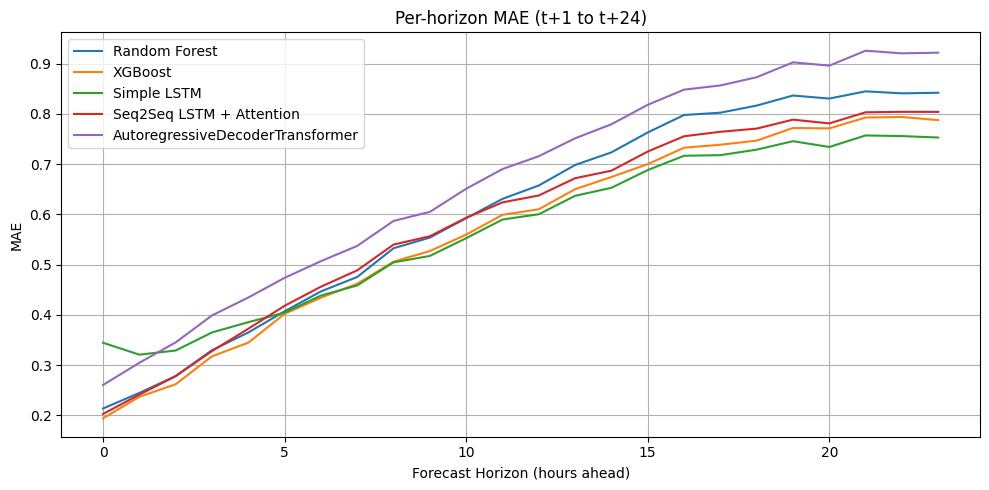

In [37]:
simple_lstm_model = LSTMForecastModel(input_size=feature_num, hidden_size=64, num_layers=2, output_size=forecasted_seq_size).to(device)
simple_lstm_model.load_state_dict(torch.load('best_lstm.pt', weights_only=True))

seq2seq_model = Seq2SeqLSTM(input_size=feature_num).to(device)
seq2seq_model.load_state_dict(torch.load('best_seq2seq.pt', weights_only=True))

xgb_model = xgb_model

rf_model = rf

auto_decoder_transformer_model = AutoDecoderTransformer(context_len=context_seq_size, forecast_len=forecasted_seq_size, input_dim=feature_num,
                              d_model=d_model, nhead=nhead, num_layers=num_layers,
                              dim_feedforward=dim_feedforward, dropout=dropout, max_len=context_seq_size+forecasted_seq_size).to(device)
auto_decoder_transformer_model.load_state_dict(torch.load('best_auto_decoder_transformer.pt', weights_only=True))

evaluator = ModelEvaluator(y_test)
evaluator.evaluate("Random Forest", rf_model, X_test_flat, model_type="random_forest")
evaluator.evaluate("XGBoost", xgb_model, X_test_flat, model_type="xg_boost")
evaluator.evaluate("Simple LSTM", simple_lstm_model, X_test, model_type="lstm", device=device, loader=val_loader)
evaluator.evaluate("Seq2Seq LSTM + Attention", seq2seq_model, X_test, model_type="seq2seq", device=device, loader=val_loader)
evaluator.evaluate("AutoregressiveDecoderTransformer", auto_decoder_transformer_model, X_test, model_type="AutoDecoderTransformer", device=device, loader=val_loader)

print(evaluator.summary_table())
evaluator.plot_per_horizon_mae()

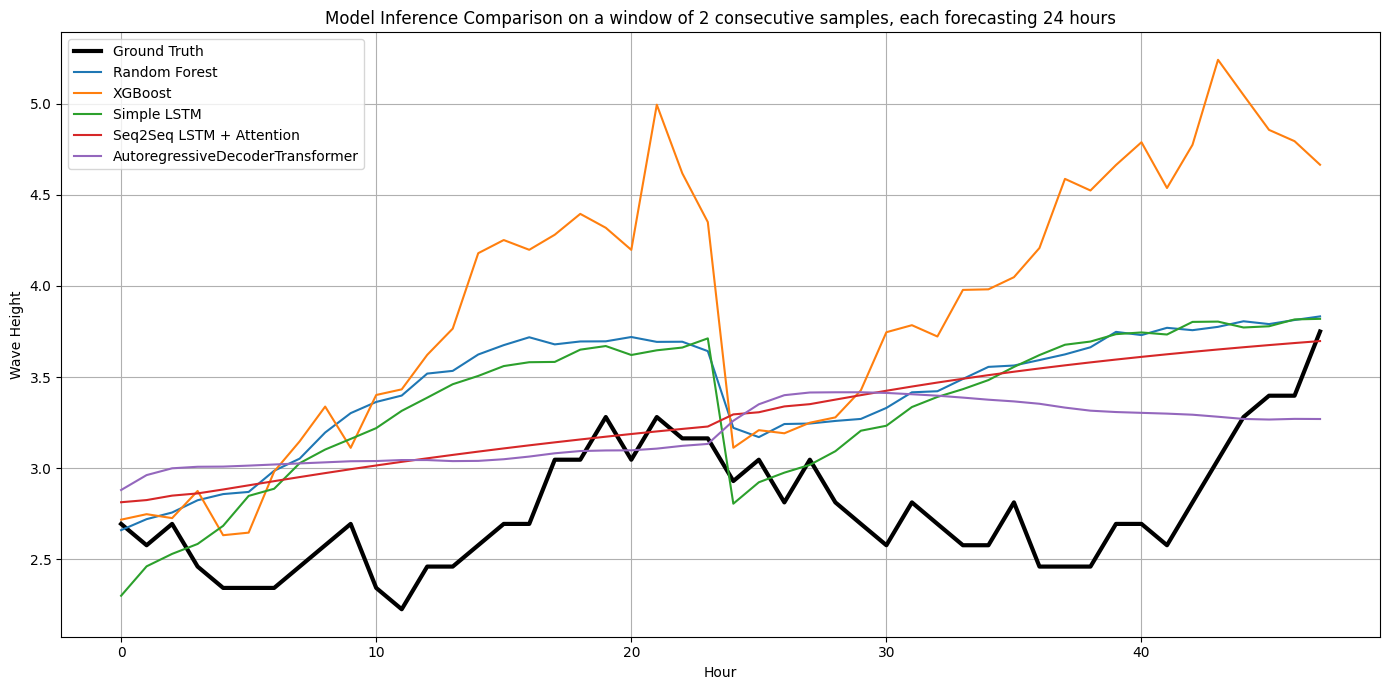

Random Forest: MAE = 0.6651, MSE = 0.5523
XGBoost: MAE = 1.1088, MSE = 1.6142
Simple LSTM: MAE = 0.6126, MSE = 0.4873
Seq2Seq LSTM + Attention: MAE = 0.5134, MSE = 0.3604
AutoregressiveDecoderTransformer: MAE = 0.4679, MSE = 0.2868


In [38]:
# Build a dictionary to compare inferences over a 1-week window
models_dict = {
    "Random Forest": (rf_model, "random_forest"),
    "XGBoost": (xgb_model, "xg_boost"),
    "Simple LSTM": (simple_lstm_model, "lstm"),
    "Seq2Seq LSTM + Attention": (seq2seq_model, "seq2seq"),
    "AutoregressiveDecoderTransformer": (auto_decoder_transformer_model, "AutoDecoderTransformer")
}

# Compare inferences on a randomly selected 1-week window (7 consecutive samples)
evaluator.compare_inferences(models_dict, X_test, y_test, device=device, week_length=2)
